In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from ast import literal_eval
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

In [154]:
RESULTS_DIR = "final_results"

In [155]:
results = {
    "rational_2": "result_rational_2_1736932231.csv",
    # "rational": "result_rational_1736690910.csv"
    } 
# RESULT_PATH = "final_results/"
# RESULT_PATH = "final_results/result_sqrt_1736690918.csv"
# RESULT_PATH = "final_results/result_manual_1736847721.csv"

In [156]:
tools = ['gubpi', 'faza', 'volesti']

In [162]:
benchmark = "rational_2"

df_res = pd.read_csv(os.path.join(RESULTS_DIR, results[benchmark]))
df_res.head()

,formula_gubpi,bounds,output_faza,time_faza,n_hrects,output_gubpi,time_gubpi,output_latte,time_latte,output_volesti,time_volesti,output2_volesti
0,(1.03*x**2 + 0.48*x*y + 8.88*x + 1.1*y**2 + 1....,"[[0.1, 1], [0.1, 1]]","(0.5898230890246405, 0.6896906251302616)",272.643,1284,"(0.711266057983094, 0.8710624008180216)",0.766,Not a monomial: (5381801554707743/4 + (2091359...,0.050,"(0.583847, 0.696218)",0.070,"(0.648784, 0.03218630839036996)"
1,(6.82*x**2 + 1.32*x*y + 8.69*x + 5.6*y**2 + 8....,"[[0.1, 1], [0.1, 1]]","(1.7129047384964033, 1.812863288989478)",589.094,5336,"(1.5639518246240296, 2.8058999441535044)",0.756,Not a monomial: (2488238794122199/8 + (1151232...,0.041,"(1.59775, 1.90326)",0.070,"(1.744203, 0.08964754620735582)"
2,(5.72*x**2 + 7.83*x*y + 4.6*x + 3.43*y**2 + 8....,"[[0.1, 1], [0.1, 1]]","(0.7618363752627153, 0.8617597761952512)",249.278,847,"(0.7126014688609542, 1.305862755213216)",0.799,Not a monomial: (9457559217478042.0 + (5944751...,0.039,"(0.745151, 0.881956)",0.065,"(0.8220304, 0.052084158826268864)"
3,(5.79*x**2 + 2.65*x*y + 4.62*x + 1.86*y**2 + 1...,"[[0.1, 1], [0.1, 1]]","(0.3981118938485614, 0.4980876414244374)",266.304,1061,"(0.5084030815642594, 0.6028950703253301)",0.627,Not a monomial: (8219069319951155/2 + (3670433...,0.043,"(0.417201, 0.507786)",0.063,"(0.4513803, 0.025515351967198098)"
4,(7.82*x**2 + 7.55*x*y + 3.35*x + 5.83*y**2 + 8...,"[[0.1, 1], [0.1, 1]]","(0.7253642810024395, 0.825341176037968)",486.233,3929,"(0.8289588063133213, 1.0884849667935454)",0.637,Not a monomial: (21910012187157464.0 + (776870...,0.043,"(0.711315, 0.850987)",0.061,"(0.7749078, 0.039051415861143884)"


In [158]:
df_list = []

for t in tools:
    df_ = df_res.reset_index()[['index',f'output_{t}', f'time_{t}']].rename(columns={f'output_{t}':'output', f'time_{t}':'time'})
    df_['tool'] = t
    df_list.append(df_)

df = pd.concat(df_list, ignore_index=True)
df['output'] = df['output'].apply(literal_eval)
df['lower'] = df['output'].apply(lambda x:x[0])
df['upper'] = df['output'].apply(lambda x:x[1])
df.tail()

,index,output,time,tool,lower,upper
85,25,"(1.00257, 1.30558)",0.070,volesti,1.002570,1.305580
86,26,"(0.584227, 0.734586)",0.068,volesti,0.584227,0.734586
87,27,"(0.558579, 0.724266)",0.070,volesti,0.558579,0.724266
88,28,"(0.478718, 0.616122)",0.070,volesti,0.478718,0.616122
89,29,"(0.981983, 1.1342)",0.070,volesti,0.981983,1.134200


In [159]:
# scaled = MinMaxScaler().fit_transform(pd.Series(pd.concat([df['lower'], df['upper']])).values.reshape(-1, 1))
# df['lower_norm'], df['upper_norm'] = scaled[:int(len(scaled)/2)], scaled[int(len(scaled)/2):]
# df.tail()

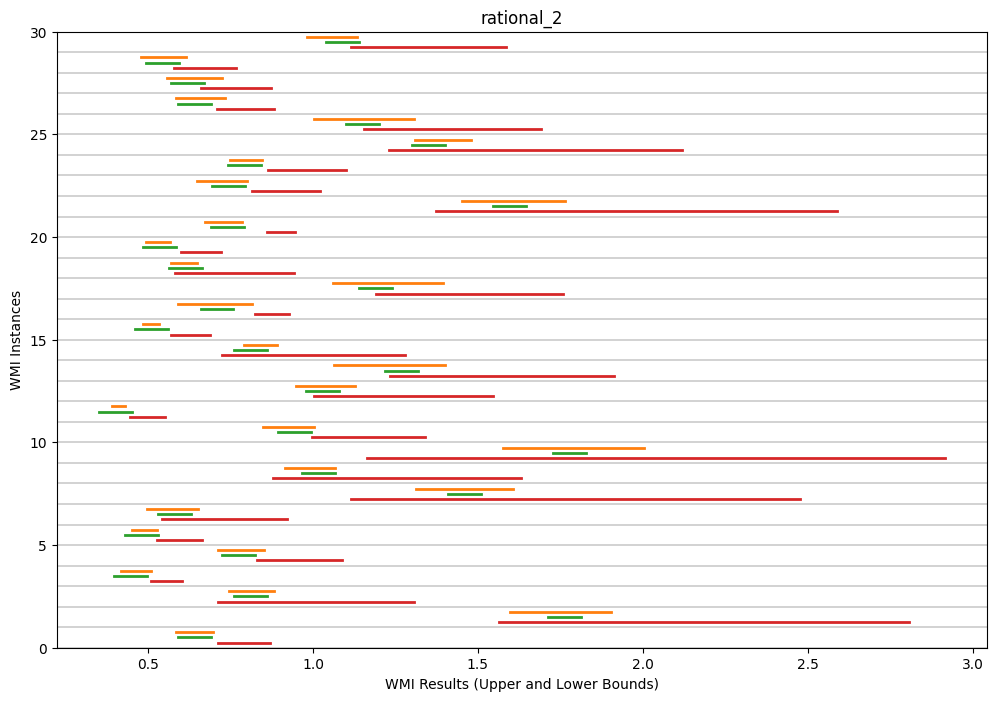

In [147]:
colors = sns.color_palette()

plt.figure(figsize=(12,8))


y_pos = {
    0: 0.25,
    1: 0.5,
    2: 0.75
}

color_map = {
    'volesti': colors[1],
    'gubpi': colors[3],
    'faza': colors[2]
    
}


# Put example lines
for i in range(len(df_res)):
    plt.axhline(y=i, color='black', linestyle='-', linewidth=0.25)

for j, t in enumerate(tools):
    for i, row in df[df.tool==t].iterrows():
        plt.plot([row['lower'],row['upper']],[row['index']+y_pos[j],row['index']+y_pos[j]], color=color_map[t], linewidth=2)

plt.ylim((0,30))
# plt.xlim((0,1))
plt.xlabel('WMI Results (Upper and Lower Bounds)')
plt.ylabel('WMI Instances')
plt.title(benchmark)
plt.show()

In [148]:
# plt.figure(figsize=(12,8))

# # n_tools = 3
# # example_margin = 0.1
# linewidth = 2
# # tool_margin = (1-2*example_margin-n_tools*(linewidth/15))/3
# # print(tool_margin)


# # 15 ->0-1
# y_pos = {
#     0: 0.25,
#     1: 0.5,
#     2: 0.75
# }
# # for i in range(n_tools):
# #     y_pos[i] = tool_margin*i+example_margin +(linewidth/15)
# #     print(y_pos[i])

# # Put example lines
# for i, res in enumerate(df['output_faza'].apply(literal_eval)):
#     plt.axhline(y=i, color='black', linestyle='-', linewidth=0.25)

# for i, res in enumerate(df['output_faza'].apply(literal_eval)):
#     plt.plot((res[0], res[1]), (i+y_pos[2], i+y_pos[2]), color=colors[2], linewidth=linewidth)

# for i, res in enumerate(df['output_gubpi']):
#     try:
#         res = literal_eval(res)
#         plt.plot((res[0], res[1]), (i+y_pos[1], i+y_pos[1]), color=colors[1], linewidth=linewidth)
#     except:
#         pass

# for i, res in enumerate(df['output_volesti']):
#     try:
#         res = literal_eval(res)
#         plt.plot((res[0], res[1]), (i+y_pos[0], i+y_pos[0]), color=colors[3], linewidth=linewidth)
#     except:
#         pass

# plt.ylim((0,30))
# plt.xlim((0,3))
# plt.xlabel('WMI Results (Upper and Lower Bounds)')
# plt.ylabel('WMI Instances')
# plt.title('Random Generated Benchmarks: Rationls with two variables')
# plt.show()